In [1]:
%matplotlib inline
from sklearn.linear_model import LinearRegression
import mglearn
from preamble import *

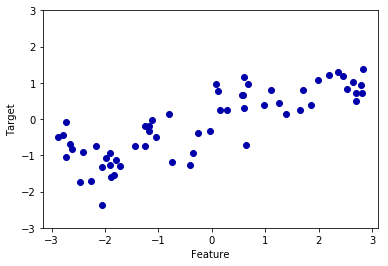

In [3]:
##### synthesis dataset 

from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=60)

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [4]:
#predictions

print("x=0, 1:", lr.predict(np.array([[0], [1]])))
print("x=2:", lr.predict(np.array([[2]])))
print("x=3:", lr.predict(np.array([[3]])))
print("x=5:", lr.predict(np.array([[5]])))



x=0, 1: [-0.032  0.362]
x=2: [0.756]
x=3: [1.15]
x=5: [1.938]


In [5]:

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [7]:
#####housing dataset
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
#load the housing dataset
boston = load_boston()
# feature matrix
X = boston.data
# target values
y=boston.target
# scaling features
X = MinMaxScaler().fit_transform(boston.data)
#
print("Data shape: {}".format(X.shape))

#X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


Data shape: (506, 13)


In [8]:
# linear regression model
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.77
Test set score: 0.64


In [9]:
# ridge regression AKA linear regression with l2 regularization
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.62


In [10]:
# ridge regression with alpha =10 
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))



Training set score: 0.69
Test set score: 0.51


In [12]:
# ridge regression with alphaa=0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.77
Test set score: 0.63


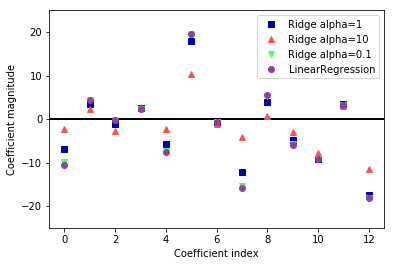

In [14]:
# visualizaiton
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

In [15]:
##### Laso Method AKA linear regression with L1 regularization

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))


Training set score: 0.29
Test set score: 0.23
Number of features used: 2


In [16]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))


Training set score: 0.77
Test set score: 0.63
Number of features used: 13


In [17]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.77
Test set score: 0.64
Number of features used: 13


Text(0, 0.5, 'Coefficient magnitude')

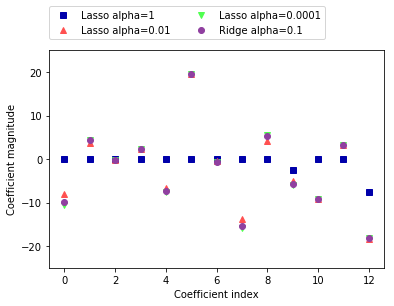

In [18]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")